## Deep Learning with tensorflow keras 

### Multiclass classification with Reuters dataset 

We will work with the Reuters dataset from the keras package:
https://keras.io/api/datasets/reuters/


In [1]:
# install tensorflow library
# pip install tensorflow


### Import the built-in Reuters dataset 


In [1]:
import numpy as np

from tensorflow.keras.datasets import reuters

# num_words restricts the data to the 10 000 most frequently occurring words in the dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)


2022-11-15 14:28:53.075380: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Inspect the data, what does it represent? 
The feature/examples are arranged into a Document Term Matrix (DTM).

If you have never worked with a Document Term Matrix (DTM) in Natural Language Processing (NLP), investigate what it is. 

In [2]:
# inspect the examples/features:
print(train_data.shape)


(8982,)


In [3]:
# each example is a list of integers (word indices)
print(train_data[10])


[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


Inspect the labels:

In [5]:
# inspect the labels:
print(train_labels.shape)


(8982,)


In [7]:
print(train_labels[1])

4


How many classes are there?

In [8]:
print(np.unique(train_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


Investigate the size of train and test, and the proportion test/train.

In [12]:

len(train_data)


8982

In [10]:
len(test_data)

2246

In [11]:
len(test_data)/len(train_data)

0.2500556668893342

Decode news wires back to text of the train_data[0] example with a keras built-in function:

In [13]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])


In [14]:
# inspect the decoded text:
print(decoded_newswire)


? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


Note: indices are offset by 3 as 0, 1 and 2 are reserved indices respectively for 
"padding", "start of sequence" and "unknown".  

### Class distribution

- How is the multiclass proportion of this dataset?
- What are the advanteges/disadvantages when we train a classifier based on this training set?

Text(0, 0.5, '% coverage in data')

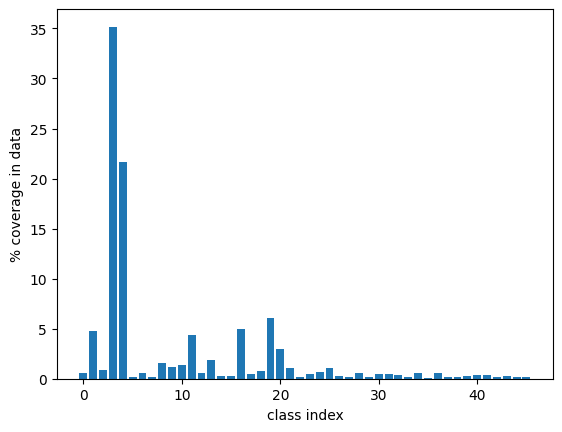

In [30]:
# calculate class distribuion from train labels

unique_labels, counts_pr_class = np.unique(train_labels, return_counts=True)
pct_pr_class = (counts_pr_class/len(train_labels))*100

# create a plot with: 
# class labels on x-axis
# and percentwise class coverage on y-axis

from matplotlib import pyplot as plt
plt.bar(list(unique_labels),list(pct_pr_class))
plt.xlabel("class index")
plt.ylabel("% coverage in data")


## Prepare the data

Implement the given function and vectorize the x_train and x_test data.

In [15]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### One-hot encode the labels
Implement the given function and one-hot encode the labels.

In [17]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [18]:
# one-hot encode the test and train labels (home made "control freak" edition):

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [19]:
# you can also use the built-in to_catecorical() function to do the same thing as in the cell above (pre made edition):

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


### Build the model architecture

Look up and discuss the difference between: 
- Sequential models 
- Functional models 

Finalize the code below so the first two dense layers have 64 neurons and relu activation functions.

What size should the last dense layer have? 

Set the last layer's activation function to softmax. (WHY?)

In [40]:
# model architecture: 

import keras
from keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(10000,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

### Compile model

Finalize the code by implementing 

rmsprop optimizer

categorical crossentropy loss function,

and accuracy metric.

In [35]:
# compile model:

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Good to know:

Categorical crossentropy is used in classification
it measures the distance between two probability distributions

between the probability distribution output by the network and the
true distribution of the labels.

By minimizing this distance you train the network to output something
as close as possible to the true labels.

In [36]:
# Set some data aside for validation:

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]  

# Train the model 

Discussion point - hyperparameter tuning

self study for later - keras tuner: https://keras.io/keras_tuner/

In [37]:
# fit the model with 20 epochs, batch size 512 and validation data as tuple of x_val and y_val
# batch size chosen as 2^x.  

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.5455 - accuracy: 0.5387 - val_loss: 1.6530 - val_accuracy: 0.6550
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.3778 - accuracy: 0.7147 - val_loss: 1.2866 - val_accuracy: 0.7330
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0335 - accuracy: 0.7786 - val_loss: 1.1228 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8130 - accuracy: 0.8240 - val_loss: 1.0349 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6480 - accuracy: 0.8631 - val_loss: 0.9541 - val_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5152 - accuracy: 0.8945 - val_loss: 0.9430 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4185 - accuracy: 0.9104 - val_loss: 0.9158 - val_accuracy: 0.8100
Epoch 8/20
16

# Plot train and validation loss

Discussion: what does the plot mean?

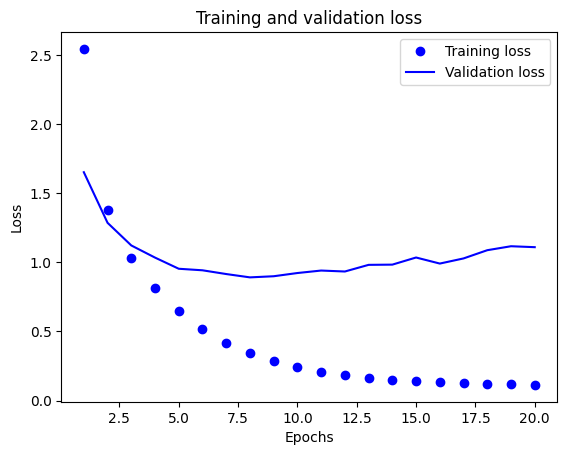

In [38]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot train and validation accuracy

Discussion: what does the plot mean?

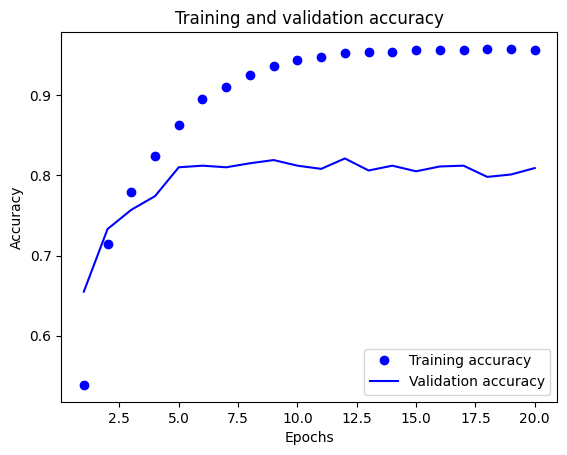

In [39]:

plt.clf() # clear the previous figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Use the plot above to decide the beneficial number of epochs.

Adjust model for beneficial nr of epochs and retrain it:

In [41]:
#fill in the optimal number of epochs:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 28ms/step - loss: 2.5989 - accuracy: 0.5525 - val_loss: 1.6625 - val_accuracy: 0.6600
Epoch 2/9
18/18 [==============================] - 0s 18ms/step - loss: 1.3973 - accuracy: 0.7122 - val_loss: 1.0947 - val_accuracy: 0.7640
Epoch 3/9
18/18 [==============================] - 0s 23ms/step - loss: 1.0366 - accuracy: 0.7747 - val_loss: 0.8447 - val_accuracy: 0.8200
Epoch 4/9
18/18 [==============================] - 0s 17ms/step - loss: 0.8162 - accuracy: 0.8250 - val_loss: 0.6543 - val_accuracy: 0.8640
Epoch 5/9
18/18 [==============================] - 0s 18ms/step - loss: 0.6466 - accuracy: 0.8643 - val_loss: 0.5144 - val_accuracy: 0.9000
Epoch 6/9
18/18 [==============================] - 0s 17ms/step - loss: 0.5179 - accuracy: 0.8928 - val_loss: 0.4031 - val_accuracy: 0.9140
Epoch 7/9
18/18 [==============================] - 0s 17ms/step - loss: 0.4098 - accuracy: 0.9135 - val_loss: 0.3145 - val_accuracy: 0.9440
Epoch 8/9
18/18 [===


### Inspect the results 

What does the output mean?

In [42]:

results

[0.937968909740448, 0.7947462201118469]


### Predict on test data

Use the predict method to predict on x_test:

In [45]:

predictions = model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [46]:
#ivestigate the shape of predictions
predictions[0].shape


(46,)

In [47]:
# investigate the predictions (e.g the 0'th entry) 

print(predictions[0])

[1.16506977e-04 3.47159134e-04 2.10359030e-05 8.57556760e-01
 1.25121355e-01 3.76847565e-05 1.07126827e-04 1.69984327e-04
 5.09422459e-03 7.41774929e-05 6.12017757e-05 1.16944232e-03
 2.94621976e-04 2.46967946e-04 2.40162190e-05 7.80730843e-05
 1.20807905e-03 2.18707501e-05 2.71873141e-04 5.66292496e-04
 8.46478157e-04 2.97339656e-03 2.36665204e-04 3.90954432e-04
 5.59264117e-05 2.47495973e-05 1.49057105e-05 1.12896050e-04
 1.42771969e-04 9.81730045e-05 3.50394665e-04 3.01776774e-04
 1.45008607e-05 1.37912884e-05 1.13072114e-04 1.63442164e-05
 7.50070438e-04 3.94153212e-05 7.61187266e-06 6.21870568e-04
 2.17343913e-05 7.97229586e-05 3.14919384e-06 5.24122916e-05
 3.45301146e-06 1.25310136e-04]


In [48]:
# sum the predictions of one row, what does this mean?
np.sum(predictions[0])


1.0

In [50]:
# 

print(predictions[0])

[1.16506977e-04 3.47159134e-04 2.10359030e-05 8.57556760e-01
 1.25121355e-01 3.76847565e-05 1.07126827e-04 1.69984327e-04
 5.09422459e-03 7.41774929e-05 6.12017757e-05 1.16944232e-03
 2.94621976e-04 2.46967946e-04 2.40162190e-05 7.80730843e-05
 1.20807905e-03 2.18707501e-05 2.71873141e-04 5.66292496e-04
 8.46478157e-04 2.97339656e-03 2.36665204e-04 3.90954432e-04
 5.59264117e-05 2.47495973e-05 1.49057105e-05 1.12896050e-04
 1.42771969e-04 9.81730045e-05 3.50394665e-04 3.01776774e-04
 1.45008607e-05 1.37912884e-05 1.13072114e-04 1.63442164e-05
 7.50070438e-04 3.94153212e-05 7.61187266e-06 6.21870568e-04
 2.17343913e-05 7.97229586e-05 3.14919384e-06 5.24122916e-05
 3.45301146e-06 1.25310136e-04]


In [51]:
predictions.shape

(2246, 46)

In [52]:
# What does this mean?
np.argmax(predictions[0])


3

In [53]:
# What is the accuracy per class in the test set?
y_test.shape

(2246, 46)

In [54]:
#a = predictions
pred_int = np.zeros_like(predictions)
pred_int[np.arange(len(predictions)), predictions.argmax(1)] = 1
print(pred_int[0])



[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [55]:
print(pred_int)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [58]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 2.9 MB/s eta 0:00:0000:0100:01


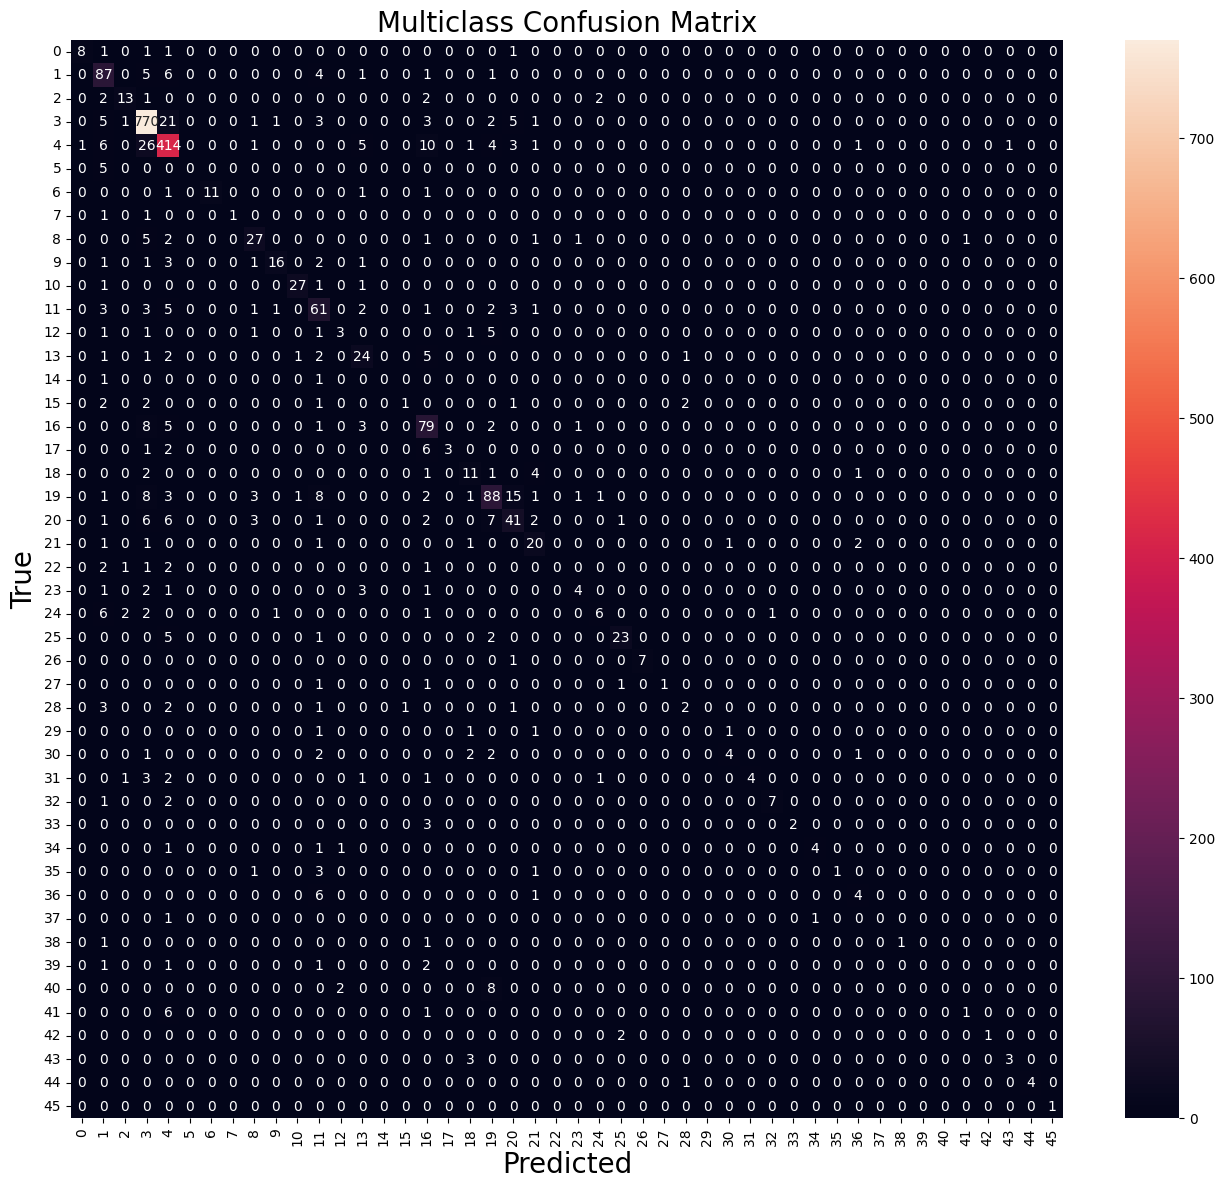

In [60]:

# Create a confusion matrix to visualize the results. 
# What do they mean? 

### Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.set_ylabel('True', fontsize=20)
plt.yticks(rotation=0)
plt.title('Multiclass Confusion Matrix', fontsize=20)

#plt.savefig('ConMat24.png')
plt.show()

Text(0, 0.5, '% coverage in data')

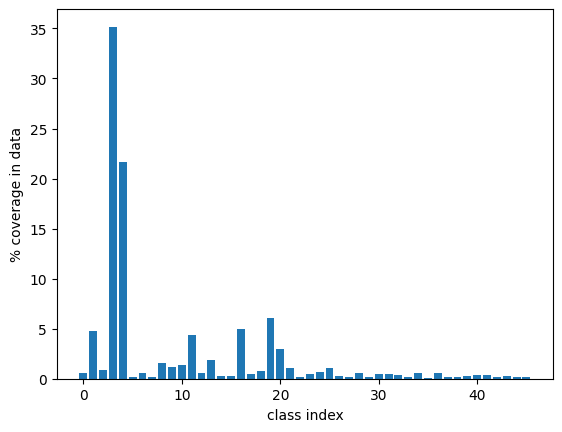

In [61]:
plt.bar(list(unique_labels),list(pct_pr_class))
plt.xlabel("class index")
plt.ylabel("% coverage in data")
